# Algoritmos básicos de procesamiento de imágenes

Usando la imagen [fresas.png](../../recursos/imagenes/Presentaciones/PSIM/imagen_fresas.png) la cual fue tomada de la página [Geeks for geeks](https://www.geeksforgeeks.org/matlab-intensity-transformation-operations-on-images/) resuelva las siguientes cuestiones.

1. Aplique las siguientes transformaciones y describa el efecto de cada transformación:
   1. Transformación n-potencial con $1<n<2$
   2. Transformación n-potencial con $0.5<n<1$
   3. Transformación LOG (Logaritmo Natural)
   4. Transformación exponencial
   5. Describa en un diagrama de bloques el algoritmo necesario para realizar este tipo de transformaciones.
   6. Investigue y desarrolle el algoritmo de la transformación $\Gamma$. La información básica la puede encontrar [aqui](https://pablocaicedor.github.io/presentaciones/PSIM/Lect005_Imag_Proc_001.html#/basic-mathematic---pixel-intensity-2)

Recuerde: Si una imagen queda completamente blanca o completamente negra, es probable que sea por mal manejo de rangos de intensidad

In [1]:
import pydicom as pyimag1
import cv2 as pyimag2
import matplotlib.pyplot as pyimag3
import numpy as pyimag4

ruta = "../../data/imagen_dicom.dcm"

Nombre del paciente: 239


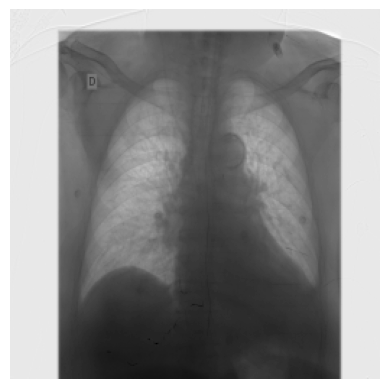

In [2]:
data_imagen = pyimag1.dcmread(ruta)
image = data_imagen.pixel_array
pyimag3.imshow(image, cmap="gray")
pyimag3.axis("off")

patient_name= data_imagen.PatientID
print(f"Nombre del paciente: {patient_name}")

2. Sea los siguientes kernels de convolución:
   1. $\begin{bmatrix}
1 & 1 & 1 \\
1 & -8 & 1 \\
1 & 1 & 1 
\end{bmatrix}$

   2. $\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 
\end{bmatrix}$  

Explique las siguientes cuestiones:

   i) Investigue las formas de realizar la convolución con opencv.
   
   ii) Aplique cada uno de los kernels de convolución y compare los resultados.
   
   iii) Explique cuales son las respectivas resoluciónes de pixel de las imagenes resultantes así como su máximo y su mínimo.

(np.float64(-0.5), np.float64(511.5), np.float64(255.5), np.float64(-0.5))

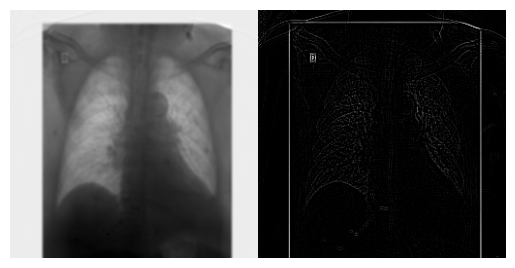

In [8]:
kernel1 = (1 / 9) * pyimag4.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
kernel2 = pyimag4.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
conv1 = pyimag2.filter2D(image, ddepth=-1, kernel=kernel1)
conv1_normalized = pyimag2.normalize(conv1, None, 0, 255, pyimag2.NORM_MINMAX)
conv2 = pyimag2.filter2D(image, ddepth=-1, kernel=kernel2)
conv2_normalized = pyimag2.normalize(conv2, None, 0, 255, pyimag2.NORM_MINMAX)
pyimag3.imshow(pyimag4.concatenate(
    (conv1_normalized, conv2_normalized), 
    axis=1), 
    cmap="gray")
pyimag3.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

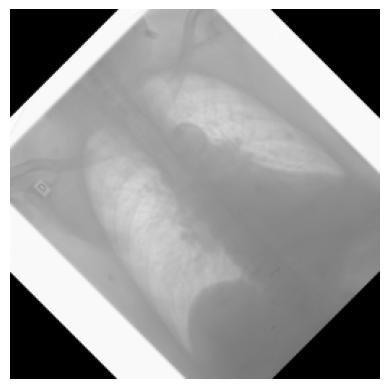

In [13]:
rows, cols = image.shape
angle = 45
M = pyimag2.getRotationMatrix2D((cols//2, rows//2), angle, 1)
transformed_image = pyimag2.warpAffine(image, M, (cols, rows))
pyimag3.imshow(transformed_image, cmap="gray")
pyimag3.axis("off")

3. Utilizando la imagen [radiografía](../../recursos/imagenes/Presentaciones/PSIM/female-chest-x-ray.jpg), aplique cada tipo de matriz afine presente en las [diapositivas de clase](https://pablocaicedor.github.io/presentaciones/PSIM/Lect005_Imag_Proc_001.html#/neighborhood-operations-5) 

4. Determinar proyecto final para PSIM.
   1. Determinar el problema a resolver.
   2. Determinar el objetivo a alcanzar
   3. Determinar el dataset
   
Recuerde, en su proyecto final,  **NO** podrá hacer uso de algoritmos de machine learning.